In [ ]:
#%pip install slicetime

# note on pyslicetime: I had to edit the main.py to change nibabel' get_data() to get_fdata()

In [1]:
import numpy as np
import nibabel as nib
from os import path as op
from slicetime.main import run_slicetime
from slicetime.make_image_stack import make_image_stack
import matplotlib.pyplot as plt
import time

In [2]:
tr_old = 1.84
tr_new = 1
time_dim = 3
offset = 0
n_slices = 80

# some example raw data
base_folder = op.join('D:\\', 'miniTRK', 'Results')
mri_folder = op.join(base_folder, '01_MRI', 'fMRI_Preproc', 'VER3', 'aligned')
design_folder = op.join('..', '..', 'Results', '02_APS_MRI_Logs', 'single_trials')
subj = '351677'
task = 'OBJ'
acq = 'ENC'
r = '1'
original_fname = subj + '_' + task + '_' + acq + '_' + r + '_To_ObjEnc1MeanFunc.nii.gz'
upsampled_fname = subj + '_' + task + '_' + acq + '_' + r + '_To_ObjEnc1MeanFunc_Upsampled.nii.gz'
in_file = op.join(mri_folder, original_fname)
out_file = op.join(mri_folder, upsampled_fname)

# sliceorder needs to be 1-based (see fakeout below)
slicetimes = np.flip(np.arange(0, tr_old, tr_old/n_slices))
slicetimes

array([1.817, 1.794, 1.771, 1.748, 1.725, 1.702, 1.679, 1.656, 1.633,
       1.61 , 1.587, 1.564, 1.541, 1.518, 1.495, 1.472, 1.449, 1.426,
       1.403, 1.38 , 1.357, 1.334, 1.311, 1.288, 1.265, 1.242, 1.219,
       1.196, 1.173, 1.15 , 1.127, 1.104, 1.081, 1.058, 1.035, 1.012,
       0.989, 0.966, 0.943, 0.92 , 0.897, 0.874, 0.851, 0.828, 0.805,
       0.782, 0.759, 0.736, 0.713, 0.69 , 0.667, 0.644, 0.621, 0.598,
       0.575, 0.552, 0.529, 0.506, 0.483, 0.46 , 0.437, 0.414, 0.391,
       0.368, 0.345, 0.322, 0.299, 0.276, 0.253, 0.23 , 0.207, 0.184,
       0.161, 0.138, 0.115, 0.092, 0.069, 0.046, 0.023, 0.   ])

In [4]:
run_slicetime(
    inpath=in_file,
    outpath=out_file,
    slicetimes=slicetimes,
    tr_old=tr_old,
    tr_new=tr_new,
)

C:\Users\Asus\anaconda3\envs\RSA\lib\site-packages\slicetime\tseriesinterp.py:260: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(f)


In [3]:
img = nib.load(out_file)
print(img.shape)
print(img.header)

(136, 136, 80, 460)
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 136 136  80 460   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.       1.52941  1.52941  1.875    1.       0.       0.       0.     ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.5:9e026117'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.0012718646
quatern_c       : 0.98575777
quatern_d       : -0.16789554
qoffset_

In [4]:
oimg = nib.load(in_file)
print(oimg.shape)
print(oimg.header)

(136, 136, 80, 250)
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 16384
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 136 136  80 250   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.       1.52941  1.52941  1.875    1.84     0.       0.       0.     ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'6.0.5:9e026117'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.0012718646
quatern_c       : 0.98575777
quatern_d       : -0.16789554
qoffset_

Text(0.5, 1.0, 'difference at same timepoint')

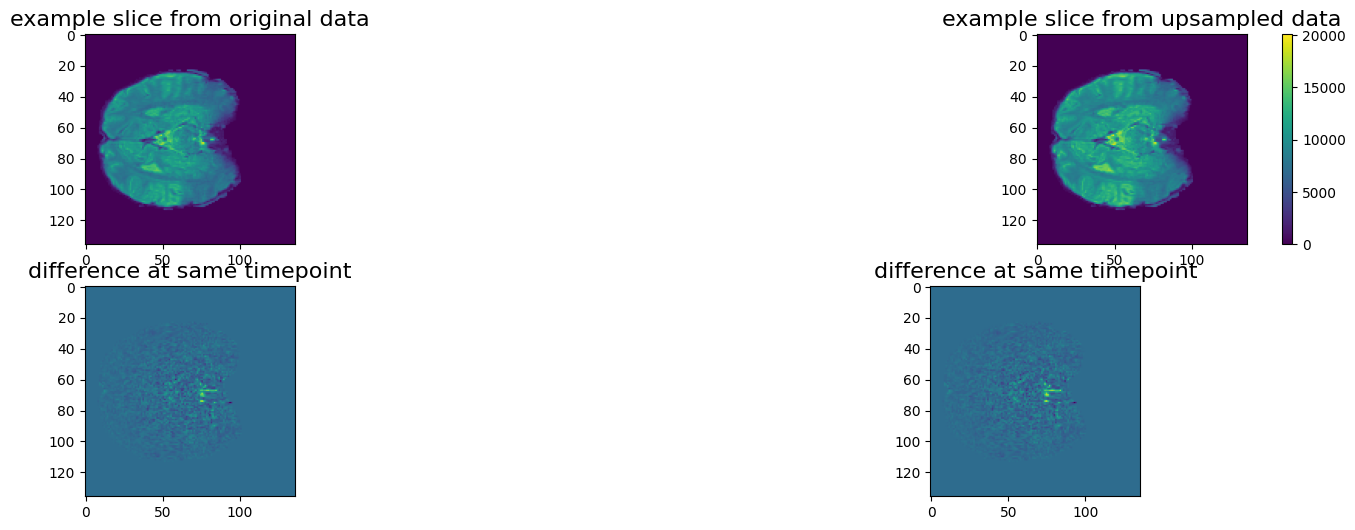

In [5]:
# plot example slice from run 1
plt.figure(figsize=(20,6))
plt.subplot(221)
plt.imshow(oimg.get_fdata()[:,:,30,25])
plt.title('example slice from original data',fontsize=16)
plt.subplot(222)
plt.imshow(img.get_fdata()[:,:,30,int((25*1.84))])
plt.title('example slice from upsampled data',fontsize=16)
plt.colorbar()
plt.subplot(223)
plt.imshow((oimg.get_fdata()[:,:,30,25])- (img.get_fdata()[:,:,30,int(25*1.84)]))
plt.title('difference at same timepoint',fontsize=16)

plt.subplot(224)
plt.imshow((oimg.get_fdata()[:,:,30,25])- (img.get_fdata()[:,:,30,int(25*1.84)-1]))
plt.title('difference at same timepoint',fontsize=16)

In [9]:
oimg.get_fdata().max()

62956.84765625

In [10]:
img.get_fdata().max()

61751.51953125

In [11]:
# upsample second run
tr_old = 1.84
tr_new = 1
time_dim = 3
offset = 0
n_slices = 80

# some example raw data
base_folder = op.join('D:\\', 'miniTRK', 'Results')
mri_folder = op.join(base_folder, '01_MRI', 'fMRI_Preproc', 'VER3', 'aligned')
design_folder = op.join('..', '..', 'Results', '02_APS_MRI_Logs', 'single_trials')
subj = '351677'
task = 'OBJ'
acq = 'ENC'
r = '2'
original_fname = subj + '_' + task + '_' + acq + '_' + r + '_To_ObjEnc1MeanFunc.nii.gz'
upsampled_fname = subj + '_' + task + '_' + acq + '_' + r + '_To_ObjEnc1MeanFunc_Upsampled.nii.gz'
in_file = op.join(mri_folder, original_fname)
out_file = op.join(mri_folder, upsampled_fname)

# sliceorder needs to be 1-based (see fakeout below)
slicetimes = np.flip(np.arange(0, tr_old, tr_old/n_slices))

start_time = time.time()

run_slicetime(
    inpath=in_file,
    outpath=out_file,
    slicetimes=slicetimes,
    tr_old=tr_old,
    tr_new=tr_new,
)

elapsed_time = time.time() - start_time

print(
    '\telapsed time: ',
    f'{time.strftime("%H:%M:%S", time.gmtime(elapsed_time))}'
)

	elapsed time:  00:01:26


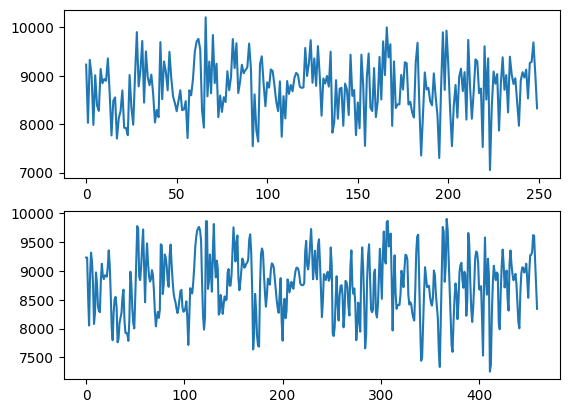

In [6]:
plt.subplot(211)
plt.plot(oimg.get_fdata()[75,75,35,:])
plt.subplot(212)
plt.plot(img.get_fdata()[75,75,35,:])

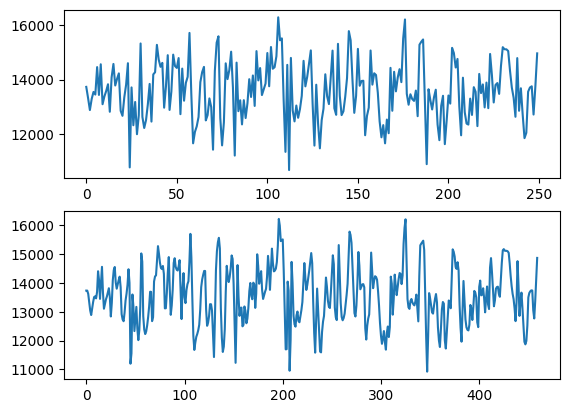

In [7]:
plt.subplot(211)
plt.plot(oimg.get_fdata()[61,61,26,:])
plt.subplot(212)
plt.plot(img.get_fdata()[61,61,26,:])